In [36]:
import csv

In [6]:
!pip install numpy

In [7]:
!pip install scikit-learn


In [8]:
!pip install matplotlib

In [9]:
!pip install pandas

In [11]:
!pip install pandas-datareader

In [4]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019,1,1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,145.090836
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,155.308350
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,154.300446
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,154.379486
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,155.871613


In [5]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2018-12-17    203.917375
2018-12-18    203.652665
2018-12-19    203.368463
2018-12-20    203.054643
2018-12-21    202.676815
2018-12-24    202.150449
2018-12-26    201.668460
2018-12-27    201.170504
2018-12-28    200.662741
2018-12-31    200.189133
Name: Adj Close, dtype: float64

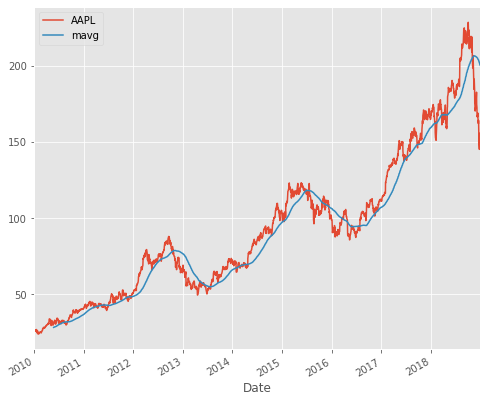

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

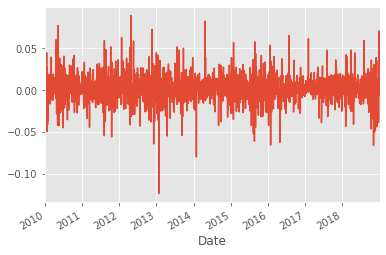

In [7]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [8]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2018-12-24,145.090836,6.640414,976.219971,103.859131,93.074097
2018-12-26,155.308350,7.091424,1039.459961,107.547356,99.431976
2018-12-27,154.300446,6.976273,1043.880005,109.854912,100.045013
2018-12-28,154.379486,7.206576,1037.079956,109.130783,99.263878
2018-12-31,155.871613,7.264152,1035.609985,109.748711,100.430641


In [9]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.326047,0.453925,0.375725,0.441585
GE,0.326047,1.000000,0.356171,0.458544,0.386325
GOOG,0.453925,0.356171,1.000000,0.407688,0.533235
IBM,0.375725,0.458544,0.407688,1.000000,0.487385
MSFT,0.441585,0.386325,0.533235,0.487385,1.000000


In [41]:
import pip

In [43]:
import csv

Text(0, 0.5, 'Returns GE')

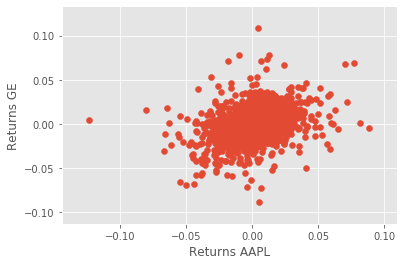

In [10]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel("Returns AAPL")
plt.ylabel("Returns GE")

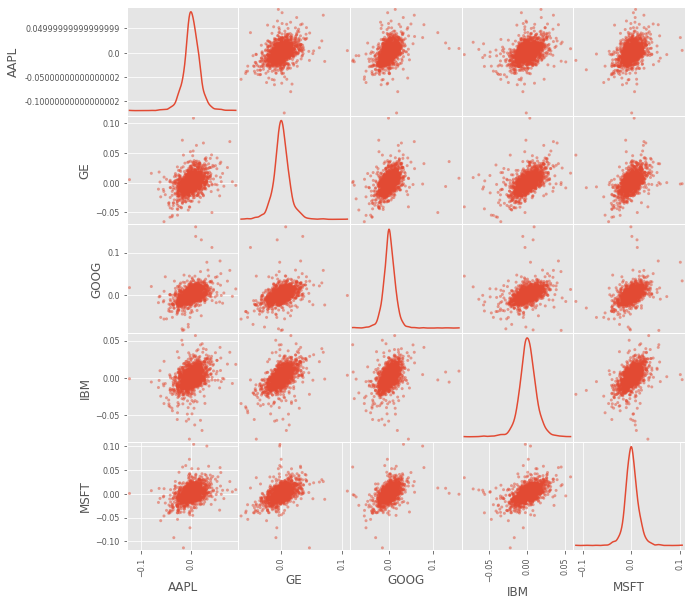

In [11]:
import matplotlib.pyplot
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017,1,1)
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

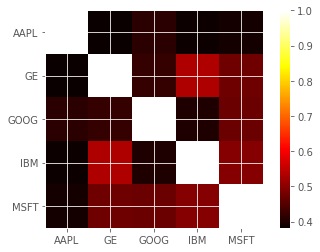

In [12]:
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017,1,1)
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

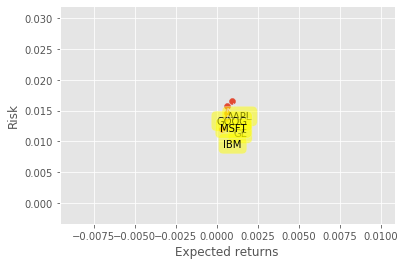

In [13]:
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017,1,1)
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [14]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017,1,1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.272409
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704


In [15]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High']-df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close']-df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2009-12-31,26.272409,88102700.0,1.323968,-1.126074
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538


In [16]:
import math
import numpy as np
from sklearn import preprocessing, model_selection,svm
from sklearn.model_selection import train_test_split
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
# Drop missing value
scaled_df.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
scaled_df['label'] = scaled_df[forecast_col].shift(-forecast_out)
X = np.array(scaled_df.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(scaled_df['label'])
y = y[:-forecast_out]
print(X.shape)
print(y.shape)

(1745, 6)
(1745,)


In [17]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

clfknn=KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [19]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ',confidencepoly2)
print('The quadratic regression 3 confidence is ',confidencepoly3)
print('The knn regression confidence is ',confidenceknn)

The linear regression confidence is  0.9613006545798639
The quadratic regression 2 confidence is  0.9639972100118411
The quadratic regression 3 confidence is  0.9657943270453727
The knn regression confidence is  0.9618937079660298


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing, model_selection,svm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set,confidenceknn,forecast_out)

[1.41647673 1.41421233 1.43197887 1.45233549 1.27956098 1.22393508
 1.23724078 1.29365893 1.32911907 1.15833531 1.12001478 1.12001478
 1.15833531 1.06873668 1.17017967 1.12001478 1.06873668 1.16414057] 0.9618937079660298 18


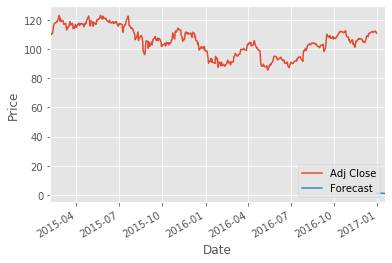

In [21]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()